## 1. Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import json
import re
import requests
import matplotlib.pyplot as plt
import sqlite3
from bs4 import BeautifulSoup
from firebase_admin import storage
from firebase_admin import credentials
import firebase_admin
import os
import dotenv
from openai import OpenAI
import plotly.express as px
from sqlalchemy import create_engine
import pymysql
import mysql.connector

## 2. Extract Data

### 2.1 Extract data file CSV

In [2]:
df_1 = pd.read_csv("raw_data/projects_data.csv")
df_1.head()

C:\Users\dzikri\AppData\Local\Temp\ipykernel_1176\2644728960.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("raw_data/projects_data.csv")


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [3]:
df_2 = pd.read_csv("raw_data/gdp_data.csv", skiprows=4)
df_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [4]:
df_3 = pd.read_csv("raw_data/electricity_access_percent.csv", skiprows=4)
df_3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


In [5]:
df_4 = pd.read_csv("raw_data/rural_population_percent.csv", skiprows=4)
df_4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [6]:
df_5 = pd.read_csv("raw_data/mystery.csv", encoding='utf-16')
df_5.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [7]:
df_6 = pd.read_csv("raw_data/population_data.csv", skiprows=4)
df_6.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


### 2.2 Extract data file XML

In [8]:
# Membaca file XML
with open('raw_data/population_data.xml', 'r') as f:
    df_7 = f.read()

# Membuat objek BeautifulSoup
soup_df_7 = BeautifulSoup(df_7, 'lxml')

# Menyiapkan list untuk menyimpan data
data = []

# Menemukan semua elemen 'record' dalam dokumen XML
for record in soup_df_7.find_all("record"):
    record_data = {}

    # Menemukan semua elemen 'field' dalam setiap 'record'
    for field in record.find_all("field"):
        name = field.get("name")
        key = field.get("key")
        value = field.text

        if name == "Country or Area":
            record_data["Country Name"] = value
            record_data["Country Code"] = key
        elif name == "Item":
            record_data["Indicator Name"] = value
            record_data["Indicator Code"] = key
        else:
            record_data[name] = value

    data.append(record_data)

# Membuat DataFrame dari data yang diekstrak
df_7 = pd.DataFrame(data)

# Menampilkan beberapa baris pertama dari DataFrame
print(df_7.head())

  Country Name Country Code     Indicator Name Indicator Code  Year  Value
0        Aruba          ABW  Population, total    SP.POP.TOTL  1960  54211
1        Aruba          ABW  Population, total    SP.POP.TOTL  1961  55438
2        Aruba          ABW  Population, total    SP.POP.TOTL  1962  56225
3        Aruba          ABW  Population, total    SP.POP.TOTL  1963  56695
4        Aruba          ABW  Population, total    SP.POP.TOTL  1964  57032


In [9]:
# Konversi tipe data kolom 'Value' menjadi numerik jika diperlukan
df_7['Value'] = pd.to_numeric(df_7['Value'], errors='coerce')

# Membuat pivot table
df_7 = df_7.pivot_table(index=['Country Name', 'Country Code',
                                    'Indicator Name', 'Indicator Code'],
                             columns='Year', values='Value').reset_index()
df_7.columns.name = None
df_7

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
259,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
261,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


### 2.3 Extract data file database

In [10]:
conn = sqlite3.connect('raw_data/population_data.db')

# 2. Buat objek kursor
cursor = conn.cursor()

# 3. Eksekusi query SQL
cursor.execute("SELECT * FROM population_data")

# 4. Ambil hasil query
result = cursor.fetchall()

# 5. Konversi hasil query menjadi dataframe
df_8 = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

# 6. Tutup koneksi
conn.close()

# Tampilkan dataframe
df_8.head()

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


### 2.4 Extract data file json

In [11]:
df_9 = pd.read_json("raw_data/population_data.json")
df_9.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


### 2.5 Extract data from api

In [12]:
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=30000"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()[1]  # Memilih bagian data dari JSON
    df_10 = pd.DataFrame(data)
    columns = ['country.value', 'countryiso3code', 'indicator.id', 'indicator.value', 'date', 'value']
    df_10 = pd.json_normalize(data)[columns]
    df_10.columns = ['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name', 'Year', 'Population']

else:
    print("Error:", response.status_code)
    
df_10


,Country Name,Country Code,Indicator Code,Indicator Name,Year,Population
0,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2023,NaN
1,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2022,720859132.0
2,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2021,702977106.0
3,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2020,685112979.0
4,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2019,667242986.0
...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,SP.POP.TOTL,"Population, total",1964,4310332.0
17020,Zimbabwe,ZWE,SP.POP.TOTL,"Population, total",1963,4177931.0
17021,Zimbabwe,ZWE,SP.POP.TOTL,"Population, total",1962,4049778.0
17022,Zimbabwe,ZWE,SP.POP.TOTL,"Population, total",1961,3925952.0


In [13]:
# Mengisi nilai NaN dengan 0
df_10.fillna(0, inplace=True)

In [14]:
# Pivot DataFrame df_6
df_10 = df_10.pivot_table(index=['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name'],
                        columns='Year', values='Population').reset_index()
df_10 = df_10.sort_values(by='Country Name')
df_10.columns.name = None
df_10

,Country Name,Country Code,Indicator Code,Indicator Name,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,SP.POP.TOTL,"Population, total",8.622466e+06,8.790140e+06,8.969047e+06,9.157465e+06,9.355514e+06,9.565147e+06,...,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07,4.112877e+07,0.0
1,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",1.306926e+08,1.341692e+08,1.378356e+08,1.416305e+08,1.456060e+08,1.497424e+08,...,5.836511e+08,6.000084e+08,6.163776e+08,6.327466e+08,6.497571e+08,6.672430e+08,6.851130e+08,7.029771e+08,7.208591e+08,0.0
2,Africa Western and Central,AFW,SP.POP.TOTL,"Population, total",9.725629e+07,9.931403e+07,1.014450e+08,1.036675e+08,1.059600e+08,1.083362e+08,...,3.978555e+08,4.086904e+08,4.197784e+08,4.311387e+08,4.426468e+08,4.543061e+08,4.661891e+08,4.781859e+08,4.903309e+08,0.0
3,Albania,ALB,SP.POP.TOTL,"Population, total",1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06,2.837849e+06,2.811666e+06,2.777689e+06,0.0
4,Algeria,DZA,SP.POP.TOTL,"Population, total",1.139431e+07,1.159861e+07,1.177826e+07,1.196945e+07,1.217910e+07,1.238126e+07,...,3.876017e+07,3.954315e+07,4.033933e+07,4.113655e+07,4.192701e+07,4.270537e+07,4.345167e+07,4.417797e+07,4.490322e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,PSE,SP.POP.TOTL,"Population, total",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.173398e+06,4.270092e+06,4.367088e+06,4.454805e+06,4.569087e+06,4.685306e+06,4.803269e+06,4.922749e+06,5.043612e+06,0.0
262,World,WLD,SP.POP.TOTL,"Population, total",3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,...,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,0.0
263,"Yemen, Rep.",YEM,SP.POP.TOTL,"Population, total",5.542459e+06,5.646668e+06,5.753386e+06,5.860197e+06,5.973803e+06,6.097298e+06,...,2.775330e+07,2.851654e+07,2.927400e+07,3.003439e+07,3.079051e+07,3.154669e+07,3.228405e+07,3.298164e+07,3.369661e+07,0.0
264,Zambia,ZMB,SP.POP.TOTL,"Population, total",3.119430e+06,3.219451e+06,3.323427e+06,3.431381e+06,3.542764e+06,3.658024e+06,...,1.573779e+07,1.624823e+07,1.676776e+07,1.729805e+07,1.783589e+07,1.838048e+07,1.892772e+07,1.947312e+07,2.001768e+07,0.0


### 2.6 Mengecek Missing values dan duplikat data pada setiap dataframe

In [15]:
### Pengecekan Missing Values dan Duplicate Data

def check_missing_values(dataframes):
    results = {}
    
    for i, df in enumerate(dataframes, start=1):
        df_name = f"df_{i}"
        missing_values = df.isnull().sum().sum()
        
        results[df_name] = {
            "missing_values": missing_values
        }
        
        print(f"{df_name} - Missing Values: {missing_values}")
    
    return results

def check_duplicate_data(dataframes):
    results = {}
    
    for i, df in enumerate(dataframes, start=1):
        df_name = f"df_{i}"
        duplicate_rows = df.duplicated().sum()
        
        results[df_name] = {
            "duplicate_rows": duplicate_rows
        }
        
        print(f"{df_name} - Duplicate Rows: {duplicate_rows}")
    
    return results

# List of dataframes
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]


print("Mengecek Missing Values pada setiap dataframe :")
# Check for missing values
missing_values_results = check_missing_values(dataframes)
print("\n")
print("Mengecek Duplikat Data pada setiap dataframe :")
# Check for duplicate data
duplicate_data_results = check_duplicate_data(dataframes)

Mengecek Missing Values pada setiap dataframe :
df_1 - Missing Values: 479951
df_2 - Missing Values: 4013
df_3 - Missing Values: 8618
df_4 - Missing Values: 504
df_5 - Missing Values: 165
df_6 - Missing Values: 429
df_7 - Missing Values: 107
df_8 - Missing Values: 165
df_9 - Missing Values: 165
df_10 - Missing Values: 0


Mengecek Duplikat Data pada setiap dataframe :
df_1 - Duplicate Rows: 0
df_2 - Duplicate Rows: 0
df_3 - Duplicate Rows: 0
df_4 - Duplicate Rows: 0
df_5 - Duplicate Rows: 0
df_6 - Duplicate Rows: 0
df_7 - Duplicate Rows: 0
df_8 - Duplicate Rows: 0
df_9 - Duplicate Rows: 0
df_10 - Duplicate Rows: 0


## 3. Transformasi dataset Projects Data

### 3.1 Cleaning dataset Projects Data

###### 3.1.1 Mengatasi Missing Values dan duplikat data

In [16]:
df_1.dropna()
df_1

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_1.drop_duplicates()
df_1.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


###### 3.1.2 Menghapus kolom yang tidak digunakan

In [18]:
drop_columns = ['projectdoc ', 'majorsector_percent ', 'sector1', 'sector2', 
                   'sector3', 'sector4', 'sector5', 'sector', 'mjsector1', 
                   'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5', 
                   'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 
                   'theme5', 'theme ', 'goal', 'financier', 'mjtheme1name', 
                   'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 
                   'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName', 
                   'Latitude', 'Longitude', 'Country', 'borrower', 'impagency', 'Unnamed: 56']
df_1.drop(columns=drop_columns, inplace=True)

df_1.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,Creating a Trade in Value-Added Database for ...,2018-06-28T00:00:00Z,June,NaN,"500,000",0,0,0,"500,000",http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,Productive Inclusion Project,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z,"200,000,000",0,"200,000,000","200,000,000",0,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,Additional Financing for Health Sector Support...,2018-06-28T00:00:00Z,June,NaN,"50,000,000",0,"58,330,000","58,330,000",0,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,Public-Private Partnerships and Public Investm...,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z,"50,000,000",0,"20,000,000","20,000,000",0,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,Nigeria For Women Project,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z,"100,000,000",0,"100,000,000","100,000,000",0,http://projects.worldbank.org/P161364?lang=en


###### 3.1.3 Penyesuaian Tipe Data

In [19]:
df_1['countryname'] = df_1['countryname'].str.split(';').str[0]
df_1['boardapprovaldate'] = pd.to_datetime(df_1['boardapprovaldate'])
df_1['boardapprovaldate'] = df_1['boardapprovaldate'].dt.year
df_1['boardapprovaldate'].fillna(0, inplace=True)
df_1['boardapprovaldate'] = df_1['boardapprovaldate'].astype(int)

C:\Users\dzikri\AppData\Local\Temp\ipykernel_1176\1572114394.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['boardapprovaldate'].fillna(0, inplace=True)


### 3.2 Dummy Variables

In [20]:
dumies = pd.get_dummies(df_1['status'])
dummies_project = df_1['countryname']
dummy_project_data = pd.concat([dummies_project, dumies], axis =1)
dummy_project_data

,countryname,Active,Closed,Dropped,Pipeline
0,World,True,False,False,False
1,Democratic Republic of the Congo,True,False,False,False
2,People's Republic of Bangladesh,True,False,False,False
3,Islamic Republic of Afghanistan,True,False,False,False
4,Federal Republic of Nigeria,True,False,False,False
...,...,...,...,...,...
18243,Republic of Chile,False,True,False,False
18244,Grand Duchy of Luxembourg,False,True,False,False
18245,Kingdom of Denmark,False,True,False,False
18246,Kingdom of the Netherlands,False,True,False,False


In [21]:
dummy_project_data.to_csv('dummy_data/dummies_project_data.csv', index=False)

### 3.3 Replace And Regex

In [22]:
df_1[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']] = df_1[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].replace({',' : ''}, regex=True)
df_1['lendprojectcost'].fillna(0, inplace=True)
df_1['lendprojectcost'] = df_1['lendprojectcost'].astype(np.int64)

C:\Users\dzikri\AppData\Local\Temp\ipykernel_1176\92446693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['lendprojectcost'].fillna(0, inplace=True)


### 3.4 Load Clean Data to Local File

In [23]:
df_1.to_csv("clean_data/cleaned_projects_data.csv", index=False)

### 3.5 Menghapus Outlier

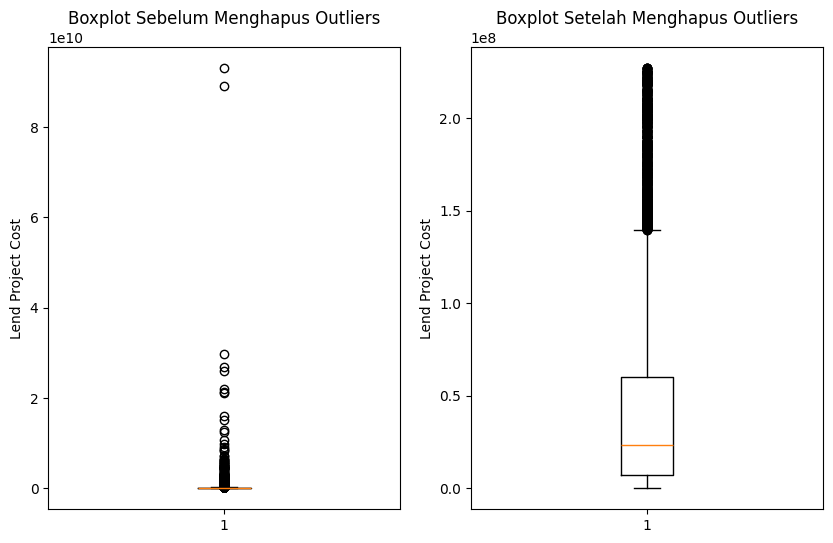

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,Creating a Trade in Value-Added Database for ...,2018,June,NaN,500000,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,Productive Inclusion Project,2018,June,2023-12-31T00:00:00Z,200000000,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,Additional Financing for Health Sector Support...,2018,June,NaN,50000000,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,Public-Private Partnerships and Public Investm...,2018,June,2023-06-28T00:00:00Z,50000000,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,Nigeria For Women Project,2018,June,2023-05-31T00:00:00Z,100000000,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,NaN,N,L,Closed,...,Agricultural Machinery Project,1948,March,1950-01-01T00:00:00Z,2500000,2500000,0,2500000,0,http://projects.worldbank.org/P006577/agricult...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,Power and Irrigation Project,1948,March,1954-12-31T00:00:00Z,13500000,13500000,0,13500000,0,http://projects.worldbank.org/P006578/power-ir...
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,Steel Mill and Railway Project,1947,August,1949-03-31T00:00:00Z,12000000,12000000,0,12000000,0,http://projects.worldbank.org/P037451/steel-mi...
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,Post War Reconstruction Project,1947,August,1949-03-31T00:00:00Z,40000000,40000000,0,40000000,0,http://projects.worldbank.org/P037362/post-war...


In [24]:
# Membuat boxplot sebelum menghapus outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_1['lendprojectcost'])
plt.title('Boxplot Sebelum Menghapus Outliers')
plt.ylabel('Lend Project Cost')

# Menghitung IQR
Q1 = df_1['lendprojectcost'].quantile(0.25)
Q3 = df_1['lendprojectcost'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outliers menggunakan teknik IQR
df_1_outliers = df_1[(df_1['lendprojectcost'] >= Q1 - 1.5 * IQR) & (df_1['lendprojectcost'] <= Q3 + 1.5 * IQR)]

# Membuat boxplot setelah menghapus outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_1_outliers['lendprojectcost'])
plt.title('Boxplot Setelah Menghapus Outliers')
plt.ylabel('Lend Project Cost')

plt.show()

df_1_outliers

### 3.6 Scaling Features Projects Data

In [25]:
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Mengambil kolom lendprojectcost dan membuat DataFrame baru untuk hasil penskalaan
df_1_scaled = df_1.copy()

# Melakukan scaling fitur lendprojectcost
df_1_scaled[['lendprojectcost']] = scaler.fit_transform(df_1_scaled[['lendprojectcost']])

# Menampilkan DataFrame setelah penskalaan
df_1_scaled


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,Creating a Trade in Value-Added Database for ...,2018,June,NaN,0.000005,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,Productive Inclusion Project,2018,June,2023-12-31T00:00:00Z,0.002150,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,Additional Financing for Health Sector Support...,2018,June,NaN,0.000538,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,Public-Private Partnerships and Public Investm...,2018,June,2023-06-28T00:00:00Z,0.000538,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,Nigeria For Women Project,2018,June,2023-05-31T00:00:00Z,0.001075,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,Power and Irrigation Project,1948,March,1954-12-31T00:00:00Z,0.000145,13500000,0,13500000,0,http://projects.worldbank.org/P006578/power-ir...
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,Steel Mill and Railway Project,1947,August,1949-03-31T00:00:00Z,0.000129,12000000,0,12000000,0,http://projects.worldbank.org/P037451/steel-mi...
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,Post War Reconstruction Project,1947,August,1949-03-31T00:00:00Z,0.000430,40000000,0,40000000,0,http://projects.worldbank.org/P037362/post-war...
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,Post-war Reconstruction Project,1947,August,1948-06-30T00:00:00Z,0.002097,195000000,0,195000000,0,http://projects.worldbank.org/P037452/post-war...


### 3.7 Feature Engineering

In [26]:
df_1_feature_engineering = df_1.copy()

# Menggabungkan kolom menjadi satu informasi dalam satu kolom
df_1_feature_engineering['feature_engineered'] = df_1_feature_engineering['id'] + '_' + df_1_feature_engineering['project_name'] + '_' + df_1_feature_engineering['lendprojectcost'].astype(str)

# Tampilkan DataFrame setelah feature engineering
df_1_feature_engineering[['id', 'project_name', 'lendprojectcost', 'feature_engineered']].head()


,id,project_name,lendprojectcost,feature_engineered
0,P162228,Creating a Trade in Value-Added Database for ...,500000,P162228_ Creating a Trade in Value-Added Datab...
1,P163962,Productive Inclusion Project,200000000,P163962_Productive Inclusion Project_200000000
2,P167672,Additional Financing for Health Sector Support...,50000000,P167672_Additional Financing for Health Sector...
3,P158768,Public-Private Partnerships and Public Investm...,50000000,P158768_Public-Private Partnerships and Public...
4,P161364,Nigeria For Women Project,100000000,P161364_Nigeria For Women Project_100000000


## 4. Transformasi semua dataset dari population_data 

- df_5 = mystery_data.csv
- df_6 = population_data.csv
- df_7 = population_data.xml
- df_8 = population_data.db
- df_9 = population_data.json
- df_10 = api population

### 4.1 Menghapus Kolom yang tidak diperlukan 

In [27]:
print(df_5.columns)

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')


In [28]:
df_5 = df_5.drop(columns=['Unnamed: 0'])
df_5

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [29]:
print(df_6.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')


In [30]:
df_6.drop(columns=['Unnamed: 62'], inplace=True)
df_6

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [31]:
df_8.drop(columns=['index'], inplace=True)
df_8

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [32]:
df_10.fillna(0, inplace=True)

### 4.2 Penyesuaian Nama Kolom dan Tipe data

In [33]:
df_8.rename(columns={
    'Country_Name': 'Country Name',
    'Country_Code': 'Country Code',
    'Indicator_Name': 'Indicator Name',
    'Indicator_Code': 'Indicator Code'
}, inplace=True)
df_8.columns.name = None

df_8

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


### 4.3 Merge Dataset population 

In [34]:
# DataFramew
data_all_population = [df_5, df_6, df_7, df_8, df_9]

# Menggabungkan DataFrames dengan mengisi nilai NaN dalam DataFrame awal dengan nilai dari DataFrame berikutnya
df_data_all_population = data_all_population[0]
for df in data_all_population[1:]:
    df_data_all_population = df_data_all_population.sort_values(by='Country Name')
    df_data_all_population = df_data_all_population.combine_first(df)

print("Dataframe Setelah digabungkan")
df_data_all_population = df_data_all_population.reset_index(drop=True)

#Menggabungkan dengan df_10
df_data_all_population = pd.concat([df_data_all_population, df_10], ignore_index=True, sort=False)
df_data_all_population.update(df_10)
df_data_all_population = df_data_all_population.dropna()
df_data_all_population = df_data_all_population.drop_duplicates(subset='Country Name')
df_data_all_population = df_data_all_population.sort_values(by='Country Name')
df_data_all_population.head()

Dataframe Setelah digabungkan


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,0.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,0.0
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,0.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,0.0
4,Algeria,DZA,"Population, total",SP.POP.TOTL,11394307.0,11598608.0,11778260.0,11969451.0,12179099.0,12381256.0,...,38760168.0,39543154.0,40339329.0,41136546.0,41927007.0,42705368.0,43451666.0,44177969.0,44903225.0,0.0


In [35]:
df_data_all_population = df_data_all_population.sort_values(by='Country Name')
df_data_all_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.622466e+06,8.790140e+06,8.969047e+06,9.157465e+06,9.355514e+06,9.565147e+06,...,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07,4.112877e+07,0.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1.306926e+08,1.341692e+08,1.378356e+08,1.416305e+08,1.456060e+08,1.497424e+08,...,5.836511e+08,6.000084e+08,6.163776e+08,6.327466e+08,6.497571e+08,6.672430e+08,6.851130e+08,7.029771e+08,7.208591e+08,0.0
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,9.725629e+07,9.931403e+07,1.014450e+08,1.036675e+08,1.059600e+08,1.083362e+08,...,3.978555e+08,4.086904e+08,4.197784e+08,4.311387e+08,4.426468e+08,4.543061e+08,4.661891e+08,4.781859e+08,4.903309e+08,0.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06,2.837849e+06,2.811666e+06,2.777689e+06,0.0
4,Algeria,DZA,"Population, total",SP.POP.TOTL,1.139431e+07,1.159861e+07,1.177826e+07,1.196945e+07,1.217910e+07,1.238126e+07,...,3.876017e+07,3.954315e+07,4.033933e+07,4.113655e+07,4.192701e+07,4.270537e+07,4.345167e+07,4.417797e+07,4.490322e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.173398e+06,4.270092e+06,4.367088e+06,4.454805e+06,4.569087e+06,4.685306e+06,4.803269e+06,4.922749e+06,5.043612e+06,0.0
262,World,WLD,"Population, total",SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,...,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,0.0
263,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.542459e+06,5.646668e+06,5.753386e+06,5.860197e+06,5.973803e+06,6.097298e+06,...,2.775330e+07,2.851654e+07,2.927400e+07,3.003439e+07,3.079051e+07,3.154669e+07,3.228405e+07,3.298164e+07,3.369661e+07,0.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.119430e+06,3.219451e+06,3.323427e+06,3.431381e+06,3.542764e+06,3.658024e+06,...,1.573779e+07,1.624823e+07,1.676776e+07,1.729805e+07,1.783589e+07,1.838048e+07,1.892772e+07,1.947312e+07,2.001768e+07,0.0


### 4.5 Handling Missing Values pada data yang telah digabungkan

In [36]:
# Mengecek nilai 0 pada dataframe
for column in df_data_all_population.columns:
    zero_values = df_data_all_population[df_data_all_population[column] == 0][column]
    if not zero_values.empty:
        print(f"Kolom '{column}' memiliki nilai 0: {zero_values.values}")

Kolom '1960' memiliki nilai 0: [0. 0.]
Kolom '1961' memiliki nilai 0: [0. 0.]
Kolom '1962' memiliki nilai 0: [0. 0.]
Kolom '1963' memiliki nilai 0: [0. 0.]
Kolom '1964' memiliki nilai 0: [0. 0.]
Kolom '1965' memiliki nilai 0: [0. 0.]
Kolom '1966' memiliki nilai 0: [0. 0.]
Kolom '1967' memiliki nilai 0: [0. 0.]
Kolom '1968' memiliki nilai 0: [0. 0.]
Kolom '1969' memiliki nilai 0: [0. 0.]
Kolom '1970' memiliki nilai 0: [0. 0.]
Kolom '1971' memiliki nilai 0: [0. 0.]
Kolom '1972' memiliki nilai 0: [0. 0.]
Kolom '1973' memiliki nilai 0: [0. 0.]
Kolom '1974' memiliki nilai 0: [0. 0.]
Kolom '1975' memiliki nilai 0: [0. 0.]
Kolom '1976' memiliki nilai 0: [0. 0.]
Kolom '1977' memiliki nilai 0: [0. 0.]
Kolom '1978' memiliki nilai 0: [0. 0.]
Kolom '1979' memiliki nilai 0: [0. 0.]
Kolom '1980' memiliki nilai 0: [0. 0.]
Kolom '1981' memiliki nilai 0: [0. 0.]
Kolom '1982' memiliki nilai 0: [0. 0.]
Kolom '1983' memiliki nilai 0: [0. 0.]
Kolom '1984' memiliki nilai 0: [0. 0.]
Kolom '1985' memiliki nil

### 4.6 Melakukan Melt Data setelah digabung

In [37]:
df_data_all_population = pd.melt(df_data_all_population, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                     var_name='Year', value_name='Population')
df_data_all_population

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130692579.0
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97256290.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Algeria,DZA,"Population, total",SP.POP.TOTL,1960,11394307.0
...,...,...,...,...,...,...
17019,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,2023,0.0
17020,World,WLD,"Population, total",SP.POP.TOTL,2023,0.0
17021,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2023,0.0
17022,Zambia,ZMB,"Population, total",SP.POP.TOTL,2023,0.0


### 4.7 Menghapus Outliers

Text(0, 0.5, 'Population')

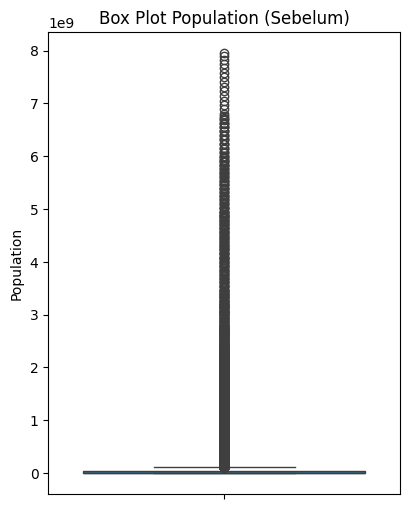

In [38]:
# Visualisasi sebelum menghapus outlier
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_data_all_population['Population'], orient='v') 
plt.title('Box Plot Population (Sebelum)')
plt.ylabel('Population')

In [39]:
def detect_outliers_iqr(df_data_all_population, column):
    Q1 = df_data_all_population[column].quantile(0.25)
    Q3 = df_data_all_population[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_data_all_population[(df_data_all_population[column] < lower_bound) | (df_data_all_population[column] > upper_bound)]
    return outliers

# Memanggil fungsi untuk mendeteksi outlier dalam kolom 'Population'
outliers_population = detect_outliers_iqr(df_data_all_population, 'Population')

# Menampilkan outlier
print("Outliers dalam kolom 'Population' sebelum dihapus:")
print(outliers_population)

Outliers dalam kolom 'Population' sebelum dihapus:
                                     Country Name Country Code  \
1                     Africa Eastern and Southern          AFE   
46                                          China          CHN   
62                     Early-demographic dividend          EAR   
63                            East Asia & Pacific          EAS   
64     East Asia & Pacific (IDA & IBRD countries)          TEA   
...                                           ...          ...   
16722   Sub-Saharan Africa (IDA & IBRD countries)          TSS   
16723  Sub-Saharan Africa (excluding high income)          SSA   
16745                               United States          USA   
16746                         Upper middle income                
16754                                       World          WLD   

          Indicator Name Indicator Code  Year    Population  
1      Population, total    SP.POP.TOTL  1960  1.306926e+08  
46     Population, total    SP.P

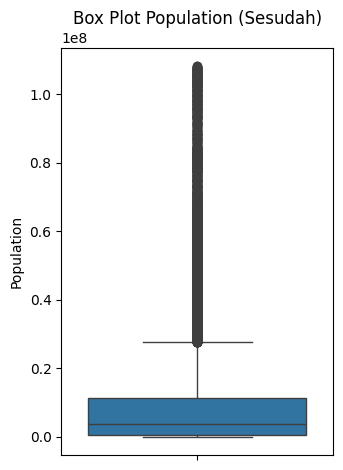

In [40]:
# Hapus outlier dari DataFrame
outliers_population = df_data_all_population.drop(outliers_population.index)

# Visualisasi setelah menghapus outlier
plt.subplot(1, 2, 2)
sns.boxplot(y=outliers_population['Population'], orient='v') 
plt.title('Box Plot Population (Sesudah)')
plt.ylabel('Population')

plt.tight_layout()
plt.show()

### 4.8 Scaling Features population gabungan 

In [41]:
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Mengambil kolom lendprojectcost dan membuat DataFrame baru untuk hasil penskalaan
df_merged_population_scaled = df_data_all_population.copy()

# Melakukan scaling fitur lendprojectcost
df_merged_population_scaled[['Population']] = scaler.fit_transform(df_data_all_population[['Population']])

# Menampilkan DataFrame setelah penskalaan
df_merged_population_scaled


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,0.001084
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,0.016437
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,0.012232
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,0.000202
4,Algeria,DZA,"Population, total",SP.POP.TOTL,1960,0.001433
...,...,...,...,...,...,...
17019,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,2023,0.000000
17020,World,WLD,"Population, total",SP.POP.TOTL,2023,0.000000
17021,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2023,0.000000
17022,Zambia,ZMB,"Population, total",SP.POP.TOTL,2023,0.000000


### 4.9 Load to csv local file 

In [42]:
df_data_all_population.to_csv("merge_data/merged_population_.csv", index=False)

## 5. Transformasi dataset gdp

### 5.1 Cleaning dataset gdp

###### 5.1.1 Menghapus Duplikat data 

In [43]:
df_2.dropna()
df_2.drop_duplicates()
df_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


##### 5.1.2 Menghapus Kolom 

In [44]:
# Menghapus kolom "Unnamed: 62" dari dataframe df_2
df_2.drop(columns=['Unnamed: 62'], inplace=True)

df_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


##### 5.1.2 Mengatasi Missing Values menggunakan SimpleImputer

In [45]:
# Membuat objek SimpleImputer dengan strategi mean
imputer = SimpleImputer(strategy="mean")

# Melakukan imputasi pada dataset
df_2.iloc[:, 4:] = imputer.fit_transform(df_2.iloc[:, 4:])

# Menampilkan dataframe hasil imputasi
df_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,2.489833e+12,2.568666e+12,2.654314e+12,2.505671e+12,2.586241e+12,2.847928e+12
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


### 5.2 Melt Dataframe

In [46]:
# Melt DataFrame untuk mengubah kolom tahun-tahun menjadi satu kolom 'Year' dan nilai GDP menjadi satu kolom 'GDP'
df_2 = pd.melt(df_2, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='gdp')

# Menampilkan DataFrame hasil akhir dengan kolom yang diinginkan
df_2 = df_2[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Year', 'gdp']]
df_2

,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,7.081251e+10
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,7.081251e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,7.081251e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,7.081251e+10
...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,2.847928e+12
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.494193e+11
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10


### 5.3 Load Data to Csv local file

In [47]:
df_2.to_csv("clean_data/cleaned_gdp_data.csv", index=False)

## 6. Transformasi dataset electricity

#### 6.1 Cleaning dataset electricity

In [48]:
df_3.fillna(0, inplace=True)

In [49]:
df_3.drop_duplicates()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,0.0,0.0
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,0.0,0.0
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,0.0,0.0
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,0.0,0.0


In [50]:
df_3.drop(columns=['Unnamed: 62'], inplace=True)
df_3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,97.794670,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,0.0
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,60.386539,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,0.0
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,81.900000,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,0.0
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,22.714685,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,0.0


In [51]:
df_3.to_csv("clean_data/cleaned_electricity_access_percent.csv", index=False)

## 7. Transformasi dataset ruralpopulationaccesspercent

#### 7.1 Cleaning data ruralpopulation

In [52]:
df_4.fillna(0, inplace=True)

In [53]:
df_4.drop_duplicates()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,0.0
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,0.0
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,0.0
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,0.0
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,0.0
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,0.0
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,0.0


In [54]:
df_4.drop(columns=['Unnamed: 62'], inplace=True)
df_4

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,69.398,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.846,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,62.125,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160


In [55]:
df_4.to_csv("clean_data/cleaned_rural_access_percent.csv", index=False)

## 8. Transformasi Lebih Lanjut

### 8.1 Kombinasikan data dari rural_population_percent.csv dan electricity_access_percent.csv yang merupakan data populasi pedesaan dan akses listrik dari berbagai negara. dan kemudian gabungkan menggunakan pandas.

In [56]:
df_3 = df_3[["Country Name", "Country Code"] + [str(year) for year in range(1960, 2018)]]
df_4 = df_4[["Country Name", "Country Code"] + [str(year) for year in range(1960, 2018)]]


# Gabungkan data berdasarkan kolom "Country Name" dan "Country Code"
merge_elec_rural = pd.merge(df_4, df_3, on=["Country Name", "Country Code"], suffixes=('_rural', '_electricity'))

merge_elec_rural.head()

,Country Name,Country Code,1960_rural,1961_rural,1962_rural,1963_rural,1964_rural,1965_rural,1966_rural,1967_rural,...,2008_electricity,2009_electricity,2010_electricity,2011_electricity,2012_electricity,2013_electricity,2014_electricity,2015_electricity,2016_electricity,2017_electricity
0,Aruba,ABW,49.224,49.239,49.254,49.270,49.285,49.300,49.315,49.330,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,91.779,91.492,91.195,90.890,90.574,90.250,89.915,89.570,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,89.565,89.202,88.796,88.376,87.942,87.496,87.035,86.559,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,69.295,69.057,68.985,68.914,68.842,68.770,68.698,68.626,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,41.550,39.017,36.538,34.128,31.795,29.555,27.407,25.359,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [57]:
merge_elec_rural.to_csv("merge_data/kombinasi_rural_electricity.csv", index=False)

### 8.2 Melt Dataframe Gabungan rural dan electricity

In [58]:
melted = pd.melt(merge_elec_rural, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Value')
melted[['Year', 'Type']] = melted['Year'].str.split('_', expand=True)

melted_2 = melted[melted['Type'].isin(['rural', 'electricity'])]

pivot = melted_2.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Type', values='Value').reset_index()

merge_elec_rural = pivot[['Country Name', 'Country Code', 'Year', 'rural', 'electricity']]
merge_elec_rural.columns = ['Country Name', 'Country Code', 'Year', 'ruralpopulationpercent', 'electricityaccesspercent']
merge_elec_rural.head(10)

,Country Name,Country Code,Year,ruralpopulationpercent,electricityaccesspercent
0,Afghanistan,AFG,1960,91.779,0.0
1,Afghanistan,AFG,1961,91.492,0.0
2,Afghanistan,AFG,1962,91.195,0.0
3,Afghanistan,AFG,1963,90.890,0.0
4,Afghanistan,AFG,1964,90.574,0.0
5,Afghanistan,AFG,1965,90.250,0.0
6,Afghanistan,AFG,1966,89.915,0.0
7,Afghanistan,AFG,1967,89.570,0.0
8,Afghanistan,AFG,1968,89.214,0.0
9,Afghanistan,AFG,1969,88.848,0.0


### 8.3 Menggabungkan population_data dengan gdp data

In [59]:
df_2 = df_2.sort_values(by=['Country Name', 'Year'])
df_2 = df_2.reset_index(drop=True)
df_2

,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08
...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2013,1.545177e+10
15308,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2014,1.589105e+10
15309,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2015,1.630467e+10
15310,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2016,1.661996e+10


In [60]:
# Buat DataFrame baru dengan kolom 'Population' dari df_population_merged
df_copy = df_data_all_population[['Population']].copy()

# Gabungkan DataFrame baru dengan df_2
gdp_and_allpop = pd.concat([df_2, df_copy], axis=1)

# Mengisi nilai NaN dengan metode forward fill
gdp_and_allpop.ffill(inplace=True)

# Mengisi nilai NaN dengan metode backward fill
gdp_and_allpop.bfill(inplace=True)

# Cetak DataFrame gabungan
gdp_and_allpop

,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp,Population
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,8622466.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08,130692579.0
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08,97256290.0
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08,1608800.0
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08,11394307.0
...,...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,0.0
17020,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,0.0
17021,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,0.0
17022,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,0.0


In [61]:
gdp_and_allpop = gdp_and_allpop.drop_duplicates()

gdp_and_allpop

,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp,Population
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,8.622466e+06
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08,1.306926e+08
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08,9.725629e+07
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08,1.608800e+06
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08,1.139431e+07
...,...,...,...,...,...,...,...
16753,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,5.043612e+06
16754,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,7.950947e+09
16755,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,3.369661e+07
16756,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,2.001768e+07


### 8.4 Membuat kolom gdp percapita

In [62]:
def calculate_gdppercapita(row):
    if row['Population'] == 0:
        return 0
    else:
        return row['gdp'] / row['Population']
# Terapkan fungsi pada DataFrame menggunakan metode apply
gdp_and_allpop['gdppercapita'] = gdp_and_allpop.apply(lambda row: calculate_gdppercapita(row), axis=1)

# Cetak DataFrame setelah feature engineering
gdp_and_allpop

C:\Users\dzikri\AppData\Local\Temp\ipykernel_1176\2825946389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_allpop['gdppercapita'] = gdp_and_allpop.apply(lambda row: calculate_gdppercapita(row), axis=1)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp,Population,gdppercapita
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,8.622466e+06,62.369375
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08,1.306926e+08,4.199847
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08,9.725629e+07,5.620888
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08,1.608800e+06,466.876673
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08,1.139431e+07,70.210505
...,...,...,...,...,...,...,...,...
16753,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,5.043612e+06,3538.301796
16754,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,7.950947e+09,2.244490
16755,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,3.369661e+07,529.602808
16756,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,2.001768e+07,891.503204


### 8.5 Menggabungkan df_merged_pop_gdp dengan merge_elec_rural

In [63]:
rural_elec_copy = merge_elec_rural[['ruralpopulationpercent', 'electricityaccesspercent']].copy()

# Gabungkan DataFrame baru dengan df_gdp_merged
df_country = pd.concat([gdp_and_allpop, rural_elec_copy], axis=1)

# Cetak DataFrame gabungan
df_country

,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp,Population,gdppercapita,ruralpopulationpercent,electricityaccesspercent
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,8.622466e+06,62.369375,91.779,0.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08,1.306926e+08,4.199847,91.492,0.0
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08,9.725629e+07,5.620888,91.195,0.0
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08,1.608800e+06,466.876673,90.890,0.0
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08,1.139431e+07,70.210505,90.574,0.0
...,...,...,...,...,...,...,...,...,...,...
16753,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,5.043612e+06,3538.301796,NaN,NaN
16754,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,7.950947e+09,2.244490,NaN,NaN
16755,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,3.369661e+07,529.602808,NaN,NaN
16756,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,2.001768e+07,891.503204,NaN,NaN


In [64]:
df_country = df_country.fillna(0)
df_country

,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp,Population,gdppercapita,ruralpopulationpercent,electricityaccesspercent
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,8.622466e+06,62.369375,91.779,0.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,5.488889e+08,1.306926e+08,4.199847,91.492,0.0
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,5.466667e+08,9.725629e+07,5.620888,91.195,0.0
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,7.511112e+08,1.608800e+06,466.876673,90.890,0.0
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,8.000000e+08,1.139431e+07,70.210505,90.574,0.0
...,...,...,...,...,...,...,...,...,...,...
16753,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,5.043612e+06,3538.301796,0.000,0.0
16754,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,7.950947e+09,2.244490,0.000,0.0
16755,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,3.369661e+07,529.602808,0.000,0.0
16756,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2017,1.784582e+10,2.001768e+07,891.503204,0.000,0.0


### 8.6 Menggabungkan df_country dengan projects_data

In [65]:
df_4['Country Name'].tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific'

In [66]:
short_country_names = []

for idx, row in df_1.iterrows():
    found_short_country = None

    for country_short in df_4['Country Name']:
        if re.search(r'\b{}\b'.format(re.escape(country_short)), row['countryname']):
            found_short_country = country_short
            break

    short_country_names.append(found_short_country)


print(len(short_country_names))
print(short_country_names)

df_1['countryname_short'] = short_country_names

18248
['World', None, 'Bangladesh', 'Afghanistan', 'Nigeria', 'Tunisia', 'Nigeria', 'Nigeria', 'Nigeria', None, None, 'Nigeria', 'Nepal', 'Nigeria', 'Kyrgyz Republic', 'Jordan', 'Myanmar', None, 'Tanzania', 'Ethiopia', 'Burkina Faso', 'Uzbekistan', 'Romania', 'Ethiopia', 'Ghana', 'Ecuador', 'Vietnam', 'China', 'Senegal', 'Grenada', 'Guyana', None, 'Indonesia', 'Kenya', 'Indonesia', 'Cambodia', 'Angola', 'India', 'China', None, 'Zambia', 'Kenya', None, 'Panama', 'Tunisia', 'Tonga', 'Pakistan', 'Pakistan', 'Bangladesh', 'Niger', 'Uganda', 'Madagascar', 'Bolivia', 'Afghanistan', 'China', 'Indonesia', None, 'Morocco', None, 'Djibouti', None, 'Maldives', 'Senegal', 'Indonesia', 'China', 'China', 'China', 'Central African Republic', 'India', None, 'Cabo Verde', "Cote d'Ivoire", 'Montenegro', 'Kyrgyz Republic', 'West Bank and Gaza', 'West Bank and Gaza', 'Ethiopia', 'Ghana', 'Haiti', 'Senegal', 'Guinea', 'Haiti', 'World', 'Samoa', 'Indonesia', None, None, 'Marshall Islands', 'Angola', 'Tunisi

In [67]:
df_1[[
    'id', 'regionname', 'countryname', 'countryname_short', 'boardapprovaldate', 'lendprojectcost'
]]

,id,regionname,countryname,countryname_short,boardapprovaldate,lendprojectcost
0,P162228,Other,World,World,2018,500000
1,P163962,Africa,Democratic Republic of the Congo,None,2018,200000000
2,P167672,South Asia,People's Republic of Bangladesh,Bangladesh,2018,50000000
3,P158768,South Asia,Islamic Republic of Afghanistan,Afghanistan,2018,50000000
4,P161364,Africa,Federal Republic of Nigeria,Nigeria,2018,100000000
...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,Chile,1948,13500000
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Luxembourg,1947,12000000
18245,P037362,Europe and Central Asia,Kingdom of Denmark,Denmark,1947,40000000
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,Netherlands,1947,195000000


In [68]:
df_1[
    df_1['countryname_short'] == 'Niger'][
        ['id', 'regionname', 'countryname', 'countryname_short'
    ]
]

,id,regionname,countryname,countryname_short
49,P163157,Africa,Republic of Niger,Niger
154,P163467,Africa,Republic of Niger,Niger
303,P163318,Africa,Republic of Niger,Niger
444,P163144,Africa,Republic of Niger,Niger
512,P160170,Africa,Republic of Niger,Niger
...,...,...,...,...
16848,P164563,Africa,Republic of Niger,Niger
16890,P165062,Africa,Republic of Niger,Niger
16983,P166602,Africa,Republic of Niger,Niger
17534,P001935,Africa,Republic of Niger,Niger


In [69]:
df_1['boardapprovaldate'] =  df_1['boardapprovaldate'].astype(np.int64)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        18248 non-null  object
 1   regionname                18248 non-null  object
 2   countryname               18248 non-null  object
 3   prodline                  18248 non-null  object
 4   lendinginstr              18002 non-null  object
 5   lendinginstrtype          18002 non-null  object
 6   envassesmentcategorycode  12437 non-null  object
 7   supplementprojectflg      18195 non-null  object
 8   productlinetype           18248 non-null  object
 9   projectstatusdisplay      18244 non-null  object
 10  status                    18244 non-null  object
 11  project_name              18248 non-null  object
 12  boardapprovaldate         18248 non-null  int64 
 13  board_approval_month      16744 non-null  object
 14  closingdate           

In [70]:
df_country['Year'] =  df_country['Year'].astype(np.int64)
df_country.info()
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16741 entries, 0 to 16757
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              16741 non-null  object 
 1   Country Code              16741 non-null  object 
 2   Indicator Name            16741 non-null  object 
 3   Indicator Code            16741 non-null  object 
 4   Year                      16741 non-null  int64  
 5   gdp                       16741 non-null  float64
 6   Population                16741 non-null  float64
 7   gdppercapita              16741 non-null  float64
 8   ruralpopulationpercent    16741 non-null  float64
 9   electricityaccesspercent  16741 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 16741 entries, 0 to 16757
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------    

### 8.7 Gabung berdasarkan nama Country Name

In [71]:
combine_projects = df_country[['Country Name', 'Year']]

# Melakukan penggabungan berdasarkan kolom Country Name dan Year
df_final = df_1.merge(
    combine_projects,
    how='right',
    left_on=['countryname_short', 'boardapprovaldate'],
    right_on=['Country Name', 'Year'])[[
    'Country Name', 'boardapprovaldate', 'lendprojectcost'
]]


df_final = df_final.sort_values(by=['Country Name', 'boardapprovaldate'])
df_final

,Country Name,boardapprovaldate,lendprojectcost
4,Afghanistan,1964.0,3500000.0
9,Afghanistan,1969.0,5000000.0
10,Afghanistan,1970.0,5000000.0
11,Afghanistan,1971.0,5000000.0
13,Afghanistan,1973.0,11500000.0
...,...,...,...
24982,Zimbabwe,NaN,NaN
24983,Zimbabwe,NaN,NaN
24984,Zimbabwe,NaN,NaN
24985,Zimbabwe,NaN,NaN


In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26431 entries, 4 to 24992
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       26431 non-null  object 
 1   boardapprovaldate  15073 non-null  float64
 2   lendprojectcost    15073 non-null  float64
dtypes: float64(2), object(1)
memory usage: 826.0+ KB


In [73]:
df_final = df_final.fillna(0)
df_final['boardapprovaldate'] = df_final['boardapprovaldate'].astype(int)

df_final

,Country Name,boardapprovaldate,lendprojectcost
4,Afghanistan,1964,3500000.0
9,Afghanistan,1969,5000000.0
10,Afghanistan,1970,5000000.0
11,Afghanistan,1971,5000000.0
13,Afghanistan,1973,11500000.0
...,...,...,...
24982,Zimbabwe,0,0.0
24983,Zimbabwe,0,0.0
24984,Zimbabwe,0,0.0
24985,Zimbabwe,0,0.0


In [74]:
# Memilih baris dengan boardapprovaldate dalam rentang tahun 1960-2023
df_final = df_final.loc[(df_final['boardapprovaldate'] >= 1960) & (df_final['boardapprovaldate'] <= 2018)]

# Reset indeks DataFrame
df_final.reset_index(drop=True, inplace=True)
df_final.head()

,Country Name,boardapprovaldate,lendprojectcost
0,Afghanistan,1964,3500000.0
1,Afghanistan,1969,5000000.0
2,Afghanistan,1970,5000000.0
3,Afghanistan,1971,5000000.0
4,Afghanistan,1973,11500000.0


In [75]:
df_final[['Country Name']].nunique()


Country Name    148
dtype: int64

In [76]:
df_finally = df_final.merge(
    df_country,
    how='right',
    left_on=['Country Name', 'boardapprovaldate'],
    right_on=['Country Name', 'Year'])[['Country Name', 'Country Code', 'Year', 'gdp', 'Population', 'gdppercapita',
                       'ruralpopulationpercent', 'electricityaccesspercent', 'lendprojectcost']]

df_finally

,Country Name,Country Code,Year,gdp,Population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,lendprojectcost
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,62.369375,91.779,0.0,NaN
1,Afghanistan,AFG,1961,5.488889e+08,130692579.0,4.199847,91.492,0.0,NaN
2,Afghanistan,AFG,1962,5.466667e+08,97256290.0,5.620888,91.195,0.0,NaN
3,Afghanistan,AFG,1963,7.511112e+08,1608800.0,466.876673,90.890,0.0,NaN
4,Afghanistan,AFG,1964,8.000000e+08,11394307.0,70.210505,90.574,0.0,3500000.0
...,...,...,...,...,...,...,...,...,...
2069896,Zimbabwe,ZWE,2017,1.784582e+10,16320537.0,1093.457979,0.000,0.0,10000000.0
2069897,Zimbabwe,ZWE,2017,1.784582e+10,16320537.0,1093.457979,0.000,0.0,10000000.0
2069898,Zimbabwe,ZWE,2017,1.784582e+10,16320537.0,1093.457979,0.000,0.0,10000000.0
2069899,Zimbabwe,ZWE,2017,1.784582e+10,16320537.0,1093.457979,0.000,0.0,10000000.0


In [77]:
# Menjumlahkan lendprojectcost berdasarkan kolom yang duplicated
df_finally = df_finally.groupby(['Country Name', 'Country Code', 'Year', 'Population', 'gdp',
                             'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent']
                            )['lendprojectcost'].sum().reset_index()

# Menghapus baris yang duplikat setelah dijumlahkan, hanya menyisakan satu baris
df_finally.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'], keep='first', inplace=True)

df_finally

,Country Name,Country Code,Year,Population,gdp,gdppercapita,ruralpopulationpercent,electricityaccesspercent,lendprojectcost
0,Afghanistan,AFG,1960,8.622466e+06,5.377778e+08,62.369375,91.779,0.000000,0.000000e+00
1,Afghanistan,AFG,1961,1.306926e+08,5.488889e+08,4.199847,91.492,0.000000,0.000000e+00
2,Afghanistan,AFG,1962,9.725629e+07,5.466667e+08,5.620888,91.195,0.000000,0.000000e+00
3,Afghanistan,AFG,1963,1.608800e+06,7.511112e+08,466.876673,90.890,0.000000,0.000000e+00
4,Afghanistan,AFG,1964,1.139431e+07,8.000000e+08,70.210505,90.574,0.000000,3.500000e+06
...,...,...,...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,2013,2.990173e+09,1.545177e+10,5.167517,67.346,37.076813,2.100000e+07
15308,Zimbabwe,ZWE,2014,5.963360e+05,1.589105e+10,26647.811301,67.499,32.300000,3.120000e+07
15309,Zimbabwe,ZWE,2015,6.386090e+05,1.630467e+10,25531.534632,67.624,33.700000,1.700000e+07
15310,Zimbabwe,ZWE,2016,2.616954e+07,1.661996e+10,635.087935,67.723,38.145138,4.270000e+07


In [78]:
# Mengganti nama kolom dan mengurutkan kolom sesuai instruksi github
df_finally.rename(columns={'Country Name': 'countryname', 'Country Code': 'countrycode', 'Year': 'year', 'Population': 'population', 
                      'gdp': 'gdp', 'gdppercapita': 'gdppercapita', 'ruralpopulationpercent': 'ruralpopulationpercent', 
                      'electricityaccesspercent': 'electricityaccesspercent', 'lendprojectcost': 'projectcost'}, inplace=True)

df_finally = df_finally[['countryname', 'countrycode', 'year', 'gdp', 'population', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost']]

df_finally.head()

,countryname,countrycode,year,gdp,population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,62.369375,91.779,0.0,0.0
1,Afghanistan,AFG,1961,5.488889e+08,130692579.0,4.199847,91.492,0.0,0.0
2,Afghanistan,AFG,1962,5.466667e+08,97256290.0,5.620888,91.195,0.0,0.0
3,Afghanistan,AFG,1963,7.511112e+08,1608800.0,466.876673,90.890,0.0,0.0
4,Afghanistan,AFG,1964,8.000000e+08,11394307.0,70.210505,90.574,0.0,3500000.0


### 8.6 Scale data df_finally

In [79]:
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Mengambil kolom 
df_finally_scaled = df_finally.copy()

# Melakukan scaling 
df_finally_scaled[['population','gdppercapita','ruralpopulationpercent','electricityaccesspercent','projectcost']] = scaler.fit_transform(df_finally[['population','gdppercapita','ruralpopulationpercent','electricityaccesspercent','projectcost']])

# Menampilkan DataFrame setelah penskalaan
df_finally_scaled


,countryname,countrycode,year,gdp,population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Afghanistan,AFG,1960,5.377778e+08,0.001151,1.506193e-08,0.937257,0.000000,0.000000
1,Afghanistan,AFG,1961,5.488889e+08,0.017448,1.014245e-09,0.934326,0.000000,0.000000
2,Afghanistan,AFG,1962,5.466667e+08,0.012984,1.357419e-09,0.931293,0.000000,0.000000
3,Afghanistan,AFG,1963,7.511112e+08,0.000215,1.127486e-07,0.928178,0.000000,0.000000
4,Afghanistan,AFG,1964,8.000000e+08,0.001521,1.695553e-08,0.924951,0.000000,0.000100
...,...,...,...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,2013,1.545177e+10,0.399200,1.247933e-09,0.687744,0.370768,0.000597
15308,Zimbabwe,ZWE,2014,1.589105e+10,0.000080,6.435328e-06,0.689307,0.323000,0.000887
15309,Zimbabwe,ZWE,2015,1.630467e+10,0.000085,6.165752e-06,0.690583,0.337000,0.000484
15310,Zimbabwe,ZWE,2016,1.661996e+10,0.003494,1.533709e-07,0.691594,0.381451,0.001214


In [80]:
df_finally.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15312 entries, 0 to 15311
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   countryname               15312 non-null  object 
 1   countrycode               15312 non-null  object 
 2   year                      15312 non-null  int64  
 3   gdp                       15312 non-null  float64
 4   population                15312 non-null  float64
 5   gdppercapita              15312 non-null  float64
 6   ruralpopulationpercent    15312 non-null  float64
 7   electricityaccesspercent  15312 non-null  float64
 8   projectcost               15312 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB


### 8.7 Load data Local File

In [81]:
df_finally.to_csv("final_data/data_final.csv", index=False)

## 9. Load Data

#### 9.1 Load Data to Cloud Firebase Admin

In [82]:
def upload_file_to_firebase(local_file_path, destination_blob_name, service_account_key_path, storage_bucket_name):
    # Initialize Firebase Admin SDK with credentials
    cred = credentials.Certificate(service_account_key_path)
    firebase_admin.initialize_app(cred, {'storageBucket': storage_bucket_name})

    # Create a storage bucket object
    bucket = storage.bucket()

    # Upload file to Firebase Storage
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(local_file_path)

    print(f"File successfully uploaded to Firebase Storage as ")

# Example usage
local_file_path = r"C:\\codes\\mini-project\\final_data\\data_final.csv"
destination_blob_name = "data_final.csv"
service_account_key_path = r"C:\\codes\\mini-project-data-engineer\\ServiceAccount.json"
storage_bucket_name = "mini-project-data-67eb7.appspot.com"

upload_file_to_firebase(local_file_path, destination_blob_name, service_account_key_path, storage_bucket_name)


File successfully uploaded to Firebase Storage as 


#### 9.2 Load Data to MySQL

In [100]:
def load_csv_to_mysql(csv_file, host, user, password, database):
    try:
        # Membuat koneksi ke database MySQL
        conn = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        c = conn.cursor()

        # Menghapus tabel jika sudah ada
        c.execute('''DROP TABLE IF EXISTS api_final''')

        # Membuat tabel baru
        c.execute('''CREATE TABLE IF NOT EXISTS api_final (
                        id INT AUTO_INCREMENT PRIMARY KEY,
                        country_name VARCHAR(255),
                        country_code VARCHAR(255),
                        year INT,
                        population FLOAT,
                        gdp FLOAT,
                        gdp_percapita FLOAT,
                        rural_population_percent FLOAT,
                        electricity_access_percent FLOAT,
                        lendprojectcost FLOAT
                    )''')

        # Membaca data dari CSV dan memasukkannya ke database
        with open(csv_file, 'r', newline='', encoding='utf-8') as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                c.execute('''INSERT INTO api_final (
                                country_name,
                                country_code,
                                year,
                                population,
                                gdp,
                                gdp_percapita,
                                rural_population_percent,
                                electricity_access_percent,
                                lendprojectcost
                            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)''',
                            (
                                row['countryname'],
                                row['countrycode'],
                                int(row['year']),
                                float(row['population']),
                                float(row['gdp']),
                                float(row['gdppercapita']),
                                float(row['ruralpopulationpercent']),
                                float(row['electricityaccesspercent']),
                                float(row['projectcost'])
                            ))

        # Menyimpan perubahan dan menutup koneksi
        conn.commit()
        print("Success Load to MySQL.")
    except Exception as e:
        print("Terjadi kesalahan:", str(e))
    finally:
        if 'conn' in locals() and conn.is_connected():
            conn.close()

csv_file = 'final_data/data_final.csv'
host = 'localhost' 
user = 'root'      
password = 'root'
database = 'miniproject'

# Memuat data dari CSV ke MySQL
load_csv_to_mysql(csv_file, host, user, password, database)

Success Load to MySQL.


## 10. Visualisasi Data

#### 10.1 Visualisasi Data With Implementation AI

In [84]:
dotenv.load_dotenv()

api = os.getenv("KEY")
client = OpenAI(
    api_key= api,
    base_url='https://api.naga.ac/v1'
    )

def generate(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return response.choices[0].message.content

analisis_prompt = pd.read_csv("final_data/data_final.csv")

prompt = ("saya memiliki dataset sebagai berikut: {analisis_prompt}" 
            "dari berbagai kolom dari dataset tersebut"
            "kolomnya tediri dari countryname, countrycode, year, gdp, population, gdppercapita, ruralpopulationpercent, electricityaccesspercent, projectcost" 
            "Buatlah analisis data yang informatif dan menarik"
            "analisis ini bisa berupa analisis statistik deskriptif, analisis korelasi, analisis distribusi, analisis tren, analisis perbandingan, atau analisis lain yang informatif.")

respon = generate(prompt)
print(respon)

Terima kasih atas dataset yang Anda berikan. Mari kita lakukan analisis yang informatif dan menarik berdasarkan data tersebut.

Analisis Statistik Deskriptif:
- Kita dapat menghitung statistik dasar seperti rata-rata, median, modus, standar deviasi, nilai minimum dan maksimum untuk setiap kolom numerik (GDP, populasi, GDP per kapita, persentase populasi pedesaan, persentase akses listrik, project cost).
- Ini akan memberikan gambaran umum mengenai distribusi dan karakteristik data pada setiap variabel.

Analisis Korelasi:
- Kita dapat menghitung koefisien korelasi Pearson atau Spearman antar variabel numerik.
- Ini akan mengungkap hubungan linier atau monoton antara variabel-variabel tersebut.
- Kita dapat mengidentifikasi variabel-variabel yang saling terkait erat.

Analisis Tren:
- Kita dapat membuat plot tren (garis waktu) untuk variabel-variabel numerik berdasarkan tahun.
- Ini akan memperlihatkan pola perubahan GDP, populasi, GDP per kapita, dll dari tahun ke tahun.
- Kita dapat m

### 10.2 Analisis Deksriptif


In [85]:
vd_1 = pd.read_csv('final_data/data_final.csv')

# Analisis Statistik Deskriptif
print("Statistik Deskriptif:")
print(vd_1.describe())

Statistik Deskriptif:
               year           gdp    population  gdppercapita  \
count  15312.000000  1.531200e+04  1.531200e+04  1.531200e+04   
mean    1988.500000  9.039213e+11  2.054731e+08  4.358483e+06   
std       16.741216  4.111706e+12  6.754549e+08  6.079548e+07   
min     1960.000000  8.824448e+06  0.000000e+00  0.000000e+00   
25%     1974.000000  3.871758e+09  8.665178e+05  2.821088e+02   
50%     1988.500000  6.848393e+10  6.313868e+06  6.171932e+03   
75%     2003.000000  3.364791e+11  4.405588e+07  1.038357e+05   
max     2017.000000  8.068379e+13  7.490415e+09  4.140863e+09   

       ruralpopulationpercent  electricityaccesspercent   projectcost  
count            15312.000000              15312.000000  1.531200e+04  
mean                49.998104                 34.097784  1.060840e+08  
std                 25.544428                 43.343224  7.636583e+08  
min                  0.000000                  0.000000  0.000000e+00  
25%                 30.152092   

### 10.3 Analisis Korelasi

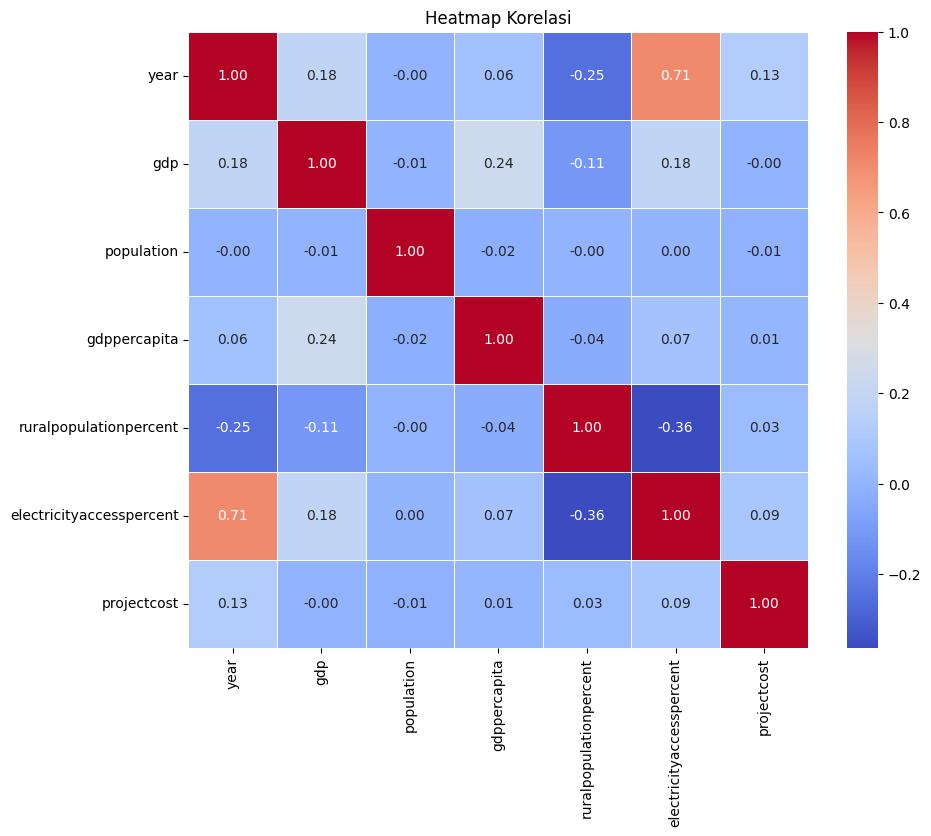

In [86]:
# Mengambil kolom numerik saja
numeric_columns = vd_1.select_dtypes(include=['float64', 'int64'])
# Analisis Korelasi
correlation_matrix = numeric_columns.corr()

# Visualisasi Korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

### 10.4 Analisis Distribusi 

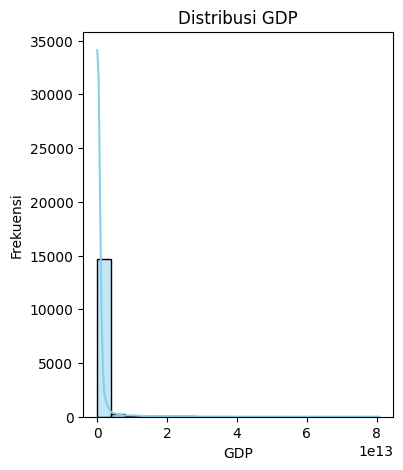

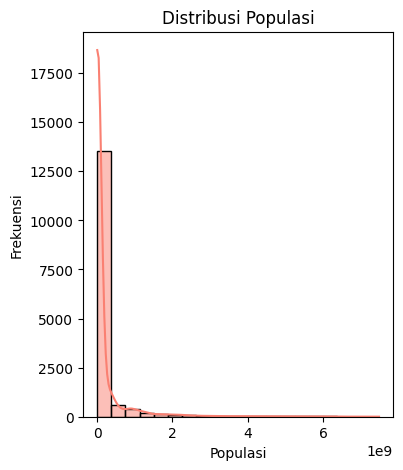

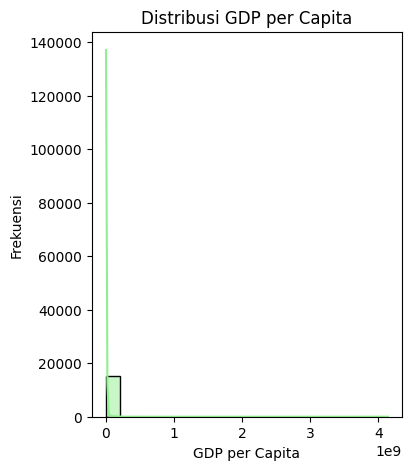

In [87]:
vd_1 = pd.read_csv('final_data/data_final.csv')

# Analisis distribusi GDP
plt.figure(figsize=(4, 5))
sns.histplot(vd_1['gdp'], bins=20, color='skyblue', kde=True)
plt.title('Distribusi GDP')
plt.xlabel('GDP')
plt.ylabel('Frekuensi')


# Analisis distribusi populasi
plt.figure(figsize=(4, 5))
sns.histplot(vd_1['population'], bins=20, color='salmon', kde=True)
plt.title('Distribusi Populasi')
plt.xlabel('Populasi')
plt.ylabel('Frekuensi')

# Analisis distribusi GDP per kapita
plt.figure(figsize=(4, 5))
sns.histplot(vd_1['gdppercapita'], bins=20, color='lightgreen', kde=True)
plt.title('Distribusi GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frekuensi')

plt.show()


### 10.5 Analisis Tren

C:\Users\dzikri\AppData\Local\Temp\ipykernel_1176\1121874062.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


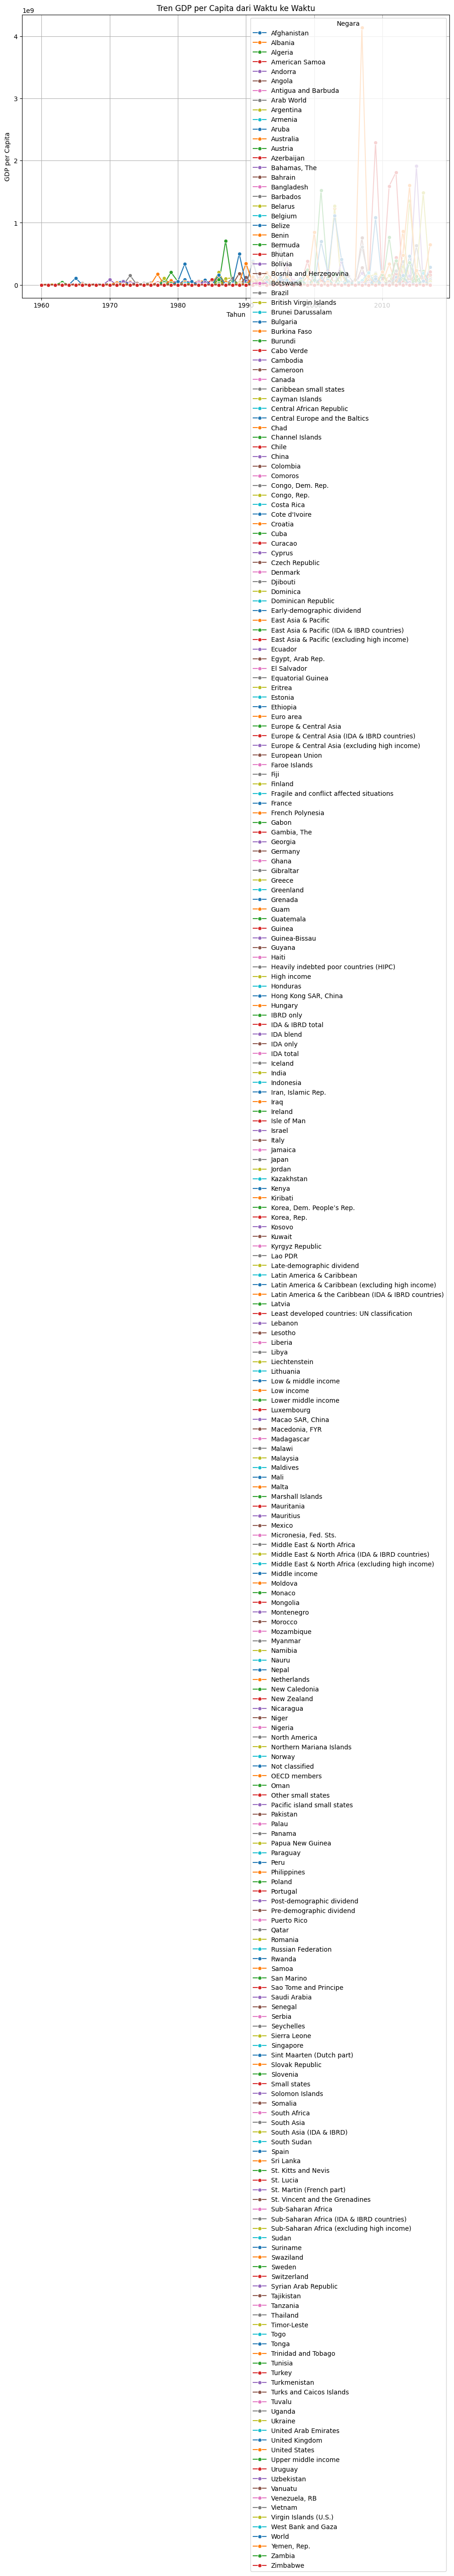

In [88]:
# Membuat plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=vd_1, x='year', y='gdppercapita', hue='countryname', palette='tab10', marker='o')
plt.title('Tren GDP per Capita dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('GDP per Capita')
plt.legend(title='Negara')
plt.grid(True)
plt.tight_layout()
plt.show()

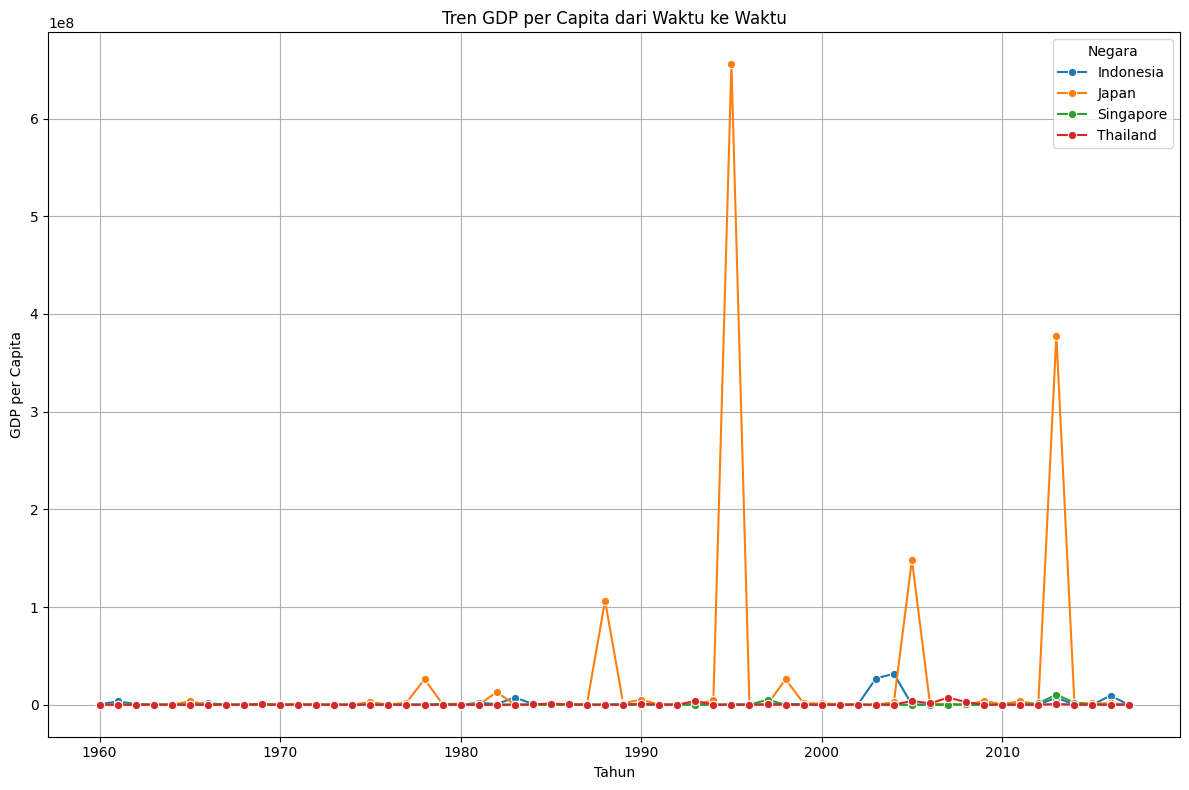

In [89]:
# Daftar negara yang akan ditampilkan dalam plot
negara_terpilih = ['Singapore', 'Indonesia', 'Japan','Thailand']   

# Filter data untuk negara-negara terpilih
data_terpilih = vd_1[vd_1['countryname'].isin(negara_terpilih)]

# Membuat plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_terpilih, x='year', y='gdppercapita', hue='countryname', palette='tab10', marker='o')
plt.title('Tren GDP per Capita dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('GDP per Capita')
plt.legend(title='Negara')
plt.grid(True)
plt.tight_layout()
plt.show()

### 10.6 Analisis Perbandingan

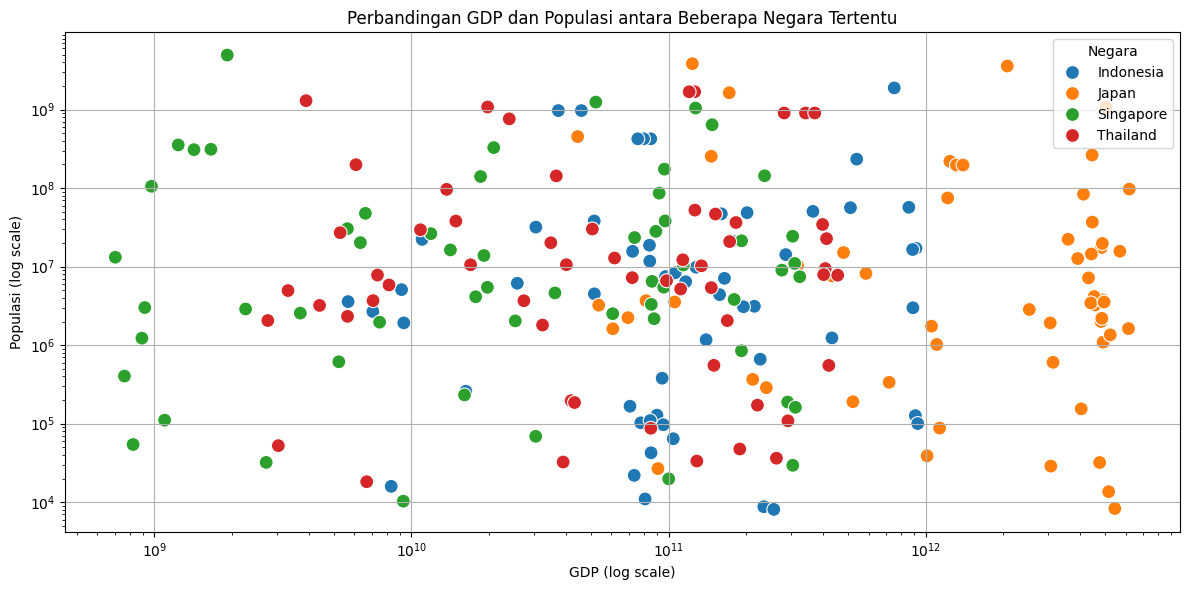

In [90]:
# Daftar negara untuk perbandingan GDP dan populasi
negara_gdp_populasi = ['Singapore', 'Indonesia', 'Japan','Thailand']  

# Filter data untuk negara-negara yang dipilih
data_gdp_populasi = vd_1[vd_1['countryname'].isin(negara_gdp_populasi)]

# Plot perbandingan GDP dan populasi antara beberapa negara tertentu
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_gdp_populasi, x='gdp', y='population', hue='countryname', palette='tab10', s=100)
plt.xscale('log')
plt.yscale('log')
plt.title('Perbandingan GDP dan Populasi antara Beberapa Negara Tertentu')
plt.xlabel('GDP (log scale)')
plt.ylabel('Populasi (log scale)')
plt.legend(title='Negara')
plt.grid(True)
plt.tight_layout()
plt.show()

### 10.7 Visualisasi Projcets Data

##### 10.7.1 Visualisasi 10 Negara berdasarkan total biaya projek

In [91]:
df_1.info()
# Mengubah tipe data kolom totalamt menjadi float
df_1['totalamt'] = df_1['totalamt'].astype(float)
              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        18248 non-null  object
 1   regionname                18248 non-null  object
 2   countryname               18248 non-null  object
 3   prodline                  18248 non-null  object
 4   lendinginstr              18002 non-null  object
 5   lendinginstrtype          18002 non-null  object
 6   envassesmentcategorycode  12437 non-null  object
 7   supplementprojectflg      18195 non-null  object
 8   productlinetype           18248 non-null  object
 9   projectstatusdisplay      18244 non-null  object
 10  status                    18244 non-null  object
 11  project_name              18248 non-null  object
 12  boardapprovaldate         18248 non-null  int64 
 13  board_approval_month      16744 non-null  object
 14  closingdate           

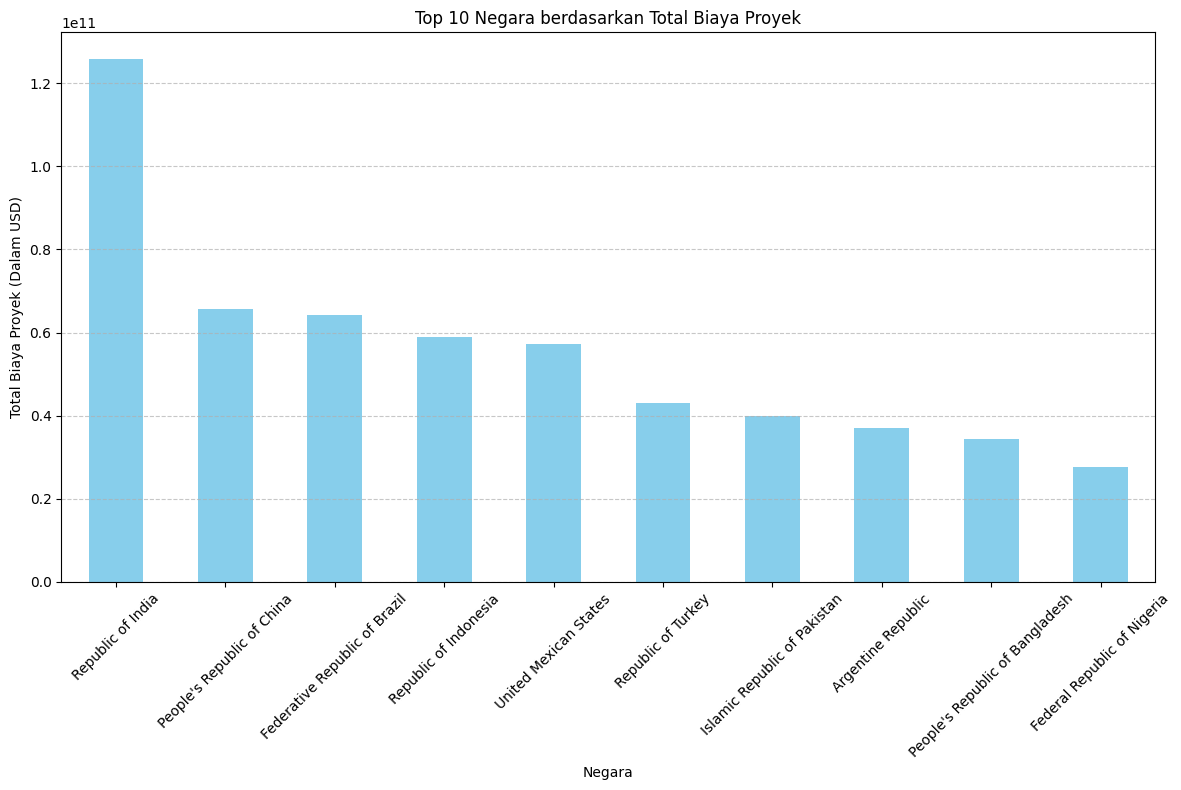

In [92]:
# Kelompokkan data berdasarkan negara dan hitung total biaya proyek untuk setiap negara
total_by_country = df_1.groupby('countryname')['totalamt'].sum()

# Urutkan negara berdasarkan total biaya proyek dari yang terbesar ke yang terkecil
negara_berdasarkan_biaya = total_by_country.sort_values(ascending=False)

# Buat visualisasi menggunakan bar plot
plt.figure(figsize=(12, 8))
negara_berdasarkan_biaya.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Negara berdasarkan Total Biaya Proyek')
plt.xlabel('Negara')
plt.ylabel('Total Biaya Proyek (Dalam USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 10.7.2 Visualisasi jumlah proyek

In [93]:
# Hitung jumlah proyek untuk setiap status proyek
project_status_counts = df_1['projectstatusdisplay'].value_counts().reset_index()
project_status_counts.columns = ['Project Status Display', 'Jumlah Proyek']

# Buat count plot menggunakan plotly express
fig = px.bar(project_status_counts, 
             x='Jumlah Proyek', 
             y='Project Status Display', 
             orientation='h', 
             title='Distribusi Project Status Display',
             labels={'Jumlah Proyek': 'Jumlah Proyek', 'Project Status Display': 'Project Status'},
             color='Jumlah Proyek',
             color_continuous_scale='viridis')

# Menampilkan plot
fig.show()
